<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/11324aios_24_dr_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os # operating system for for locating directory and subdirectory folders
import numpy as np # for performing linerar algebra

In [ ]:
os.listdir('/content/drive/MyDrive/DR fundus images/split')

['train', 'val', 'test']

In [ ]:
os.listdir('/content/drive/MyDrive/DR fundus images/split/train')

['DR1', 'DR3', 'DR2']

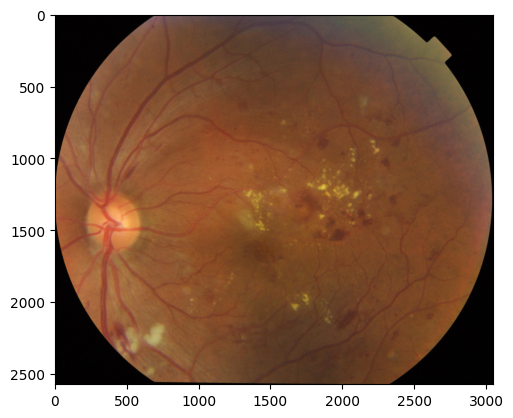

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

DR2image = Image.open('/content/drive/MyDrive/DR fundus images/split/train/DR2/1ffa93b6-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(DR2image)

In [ ]:
DR2image.size, DR2image.format, DR2image.mode

((3046, 2572), 'JPEG', 'RGB')

In [81]:
import glob

# list all the images in the DR1 directory
DR1 = glob.glob('/content/drive/MyDrive/DR fundus images/split/train/DR1/*.JPG')

# no. of files in the directory Parasitized
print('No. of files in the DR1 directory', len(DR1))

# first few images
DR1[:5]

No. of files in the DR1 directory 12


['/content/drive/MyDrive/DR fundus images/split/train/DR1/1ffa95b8-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/DR fundus images/split/train/DR1/1ffa95b9-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/DR fundus images/split/train/DR1/1ffa95b1-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/DR fundus images/split/train/DR1/1ffa95bb-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/DR fundus images/split/train/DR1/1ffa95d4-8d87-11e8-9daf-6045cb817f5b..JPG']

<ipython-input-20-c1a848f494a2>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 10, ind+1)


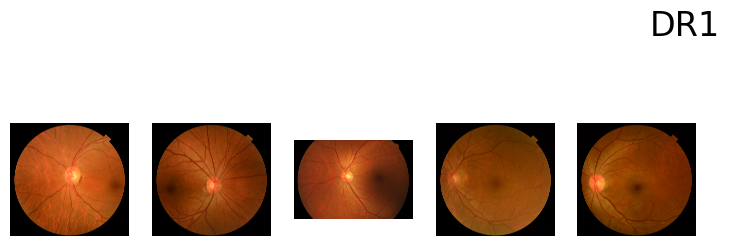

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('DR1', fontsize=24)

for ind, img_src in enumerate(DR1[:5]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

In [82]:
# list all the images in the DR2 directory
DR2 = glob.glob('/content/drive/MyDrive/DR fundus images/split/train/DR2/*.JPG')

# no. of files in the DR2 directory
print('No. of files in the DR2 directory', len(DR2))

# first few images
DR2[:5]

No. of files in the DR2 directory 34


['/content/drive/MyDrive/DR fundus images/split/train/DR2/1ffa93b1-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/DR fundus images/split/train/DR2/1ffa93b2-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/DR fundus images/split/train/DR2/1ffa93b9-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/DR fundus images/split/train/DR2/1ffa93c1-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/DR fundus images/split/train/DR2/1ffa93bd-8d87-11e8-9daf-6045cb817f5b..JPG']

<ipython-input-22-801364eff0c4>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 10, ind+1)


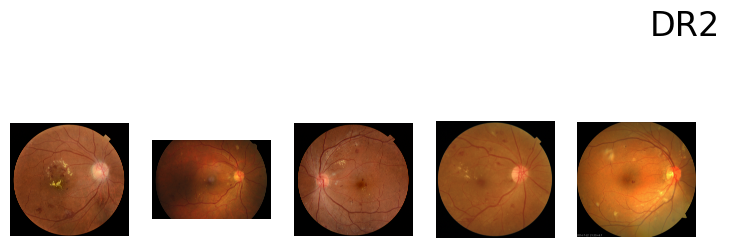

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('DR2', fontsize=24)

for ind, img_src in enumerate(DR2[:5]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

In [83]:
# list all the images in the DR3 directory
DR3 = glob.glob('/content/drive/MyDrive/DR fundus images/split/train/DR2/*.JPG')

# no. of files in the DR3 directory
print('No. of files in the DR3 directory', len(DR3))

# first few images
DR3[:5]

No. of files in the DR3 directory 34


['/content/drive/MyDrive/DR fundus images/split/train/DR2/1ffa93b1-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/DR fundus images/split/train/DR2/1ffa93b2-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/DR fundus images/split/train/DR2/1ffa93b9-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/DR fundus images/split/train/DR2/1ffa93c1-8d87-11e8-9daf-6045cb817f5b..JPG',
 '/content/drive/MyDrive/DR fundus images/split/train/DR2/1ffa93bd-8d87-11e8-9daf-6045cb817f5b..JPG']

<ipython-input-24-faaadfde2069>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 10, ind+1)


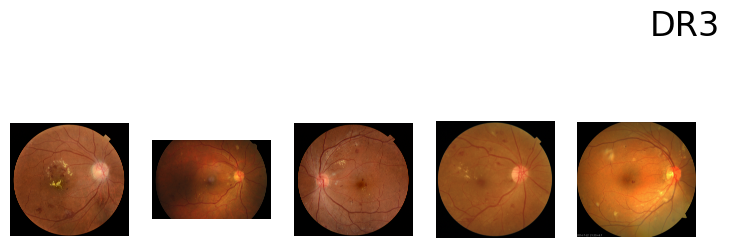

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('DR3', fontsize=24)

for ind, img_src in enumerate(DR3[:5]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

In [84]:
# Image augmentation methods for training set
from keras.preprocessing.image import ImageDataGenerator
datagen_aug = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2)

datagen = ImageDataGenerator(rescale=1/255)


In [85]:
# defining parameters for image sets for model training and compiling, fitting, predicting, evaluating, and predicting unknown image
train_images = datagen_aug.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/train',
                                               target_size=(150,150),
                                               class_mode='categorical')

validation_images = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/val',
                                               target_size=(150,150),
                                               class_mode='categorical')

test_images = datagen.flow_from_directory('/content/drive/MyDrive/DR fundus images/split/test',
                                               target_size=(150,150),
                                               class_mode='categorical')


Found 73 images belonging to 3 classes.
Found 19 images belonging to 3 classes.
Found 14 images belonging to 3 classes.


In [ ]:
# constructing convuluted neural network archietecture

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 128)      

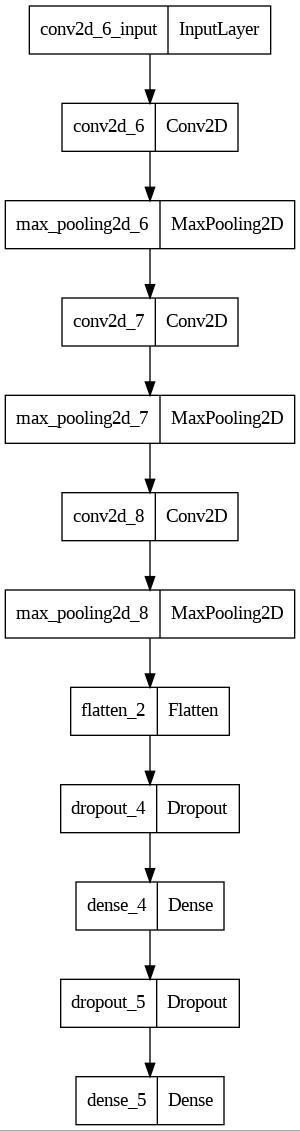

<Figure size 500x1000 with 0 Axes>

In [ ]:
from tensorflow.keras.utils import to_categorical, plot_model

plt.figure(figsize=(5, 10))
plot_model(model, to_file="model.jpg")

In [142]:
history = model.fit(train_images,
          batch_size=10,
          epochs=18,
          verbose=1,
          validation_data=validation_images)

model.save('DRCNN_model.keras')

Epoch 1/18
3/3 [==============================] - 13s 4s/step - loss: 0.3618 - accuracy: 0.8767 - val_loss: 0.9891 - val_accuracy: 0.7895
Epoch 2/18
3/3 [==============================] - 8s 2s/step - loss: 0.2749 - accuracy: 0.9041 - val_loss: 0.9171 - val_accuracy: 0.7895
Epoch 3/18
3/3 [==============================] - 9s 2s/step - loss: 0.5427 - accuracy: 0.7671 - val_loss: 0.6671 - val_accuracy: 0.8947
Epoch 4/18
3/3 [==============================] - 9s 4s/step - loss: 0.5018 - accuracy: 0.7397 - val_loss: 0.8601 - val_accuracy: 0.7368
Epoch 5/18
3/3 [==============================] - 9s 2s/step - loss: 0.4711 - accuracy: 0.7945 - val_loss: 0.9440 - val_accuracy: 0.6842
Epoch 6/18
3/3 [==============================] - 9s 2s/step - loss: 0.4448 - accuracy: 0.8082 - val_loss: 0.6120 - val_accuracy: 0.7368
Epoch 7/18
3/3 [==============================] - 9s 4s/step - loss: 0.4415 - accuracy: 0.7808 - val_loss: 0.5826 - val_accuracy: 0.7895
Epoch 8/18
3/3 [========================

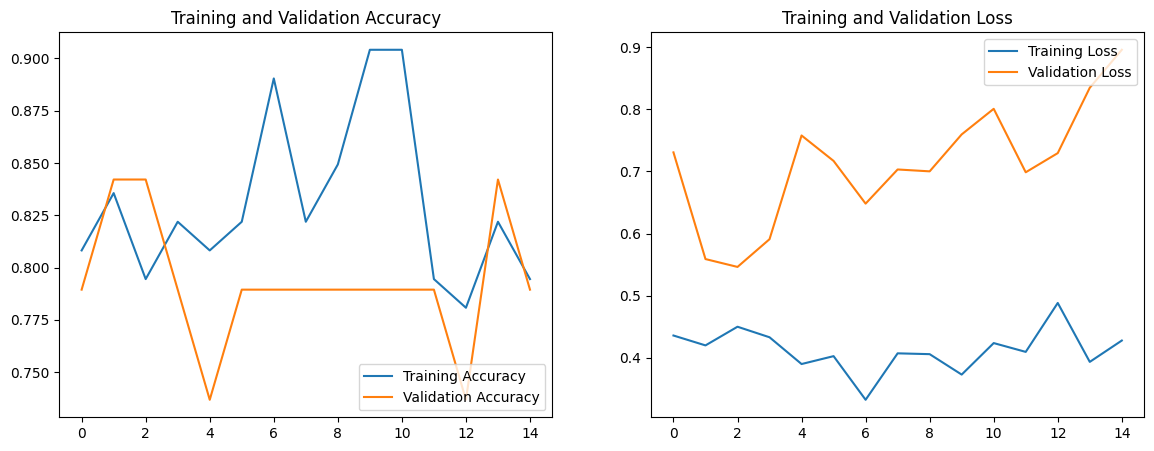

In [131]:
# model training performance on training accuracy and validation accuracy with training loss and validation loss

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [132]:
y_pred = model.predict(test_images)
y_pred

1/1 [==============================] - 1s 1s/step


array([[1.21663674e-04, 4.42027464e-04, 9.99436259e-01],
       [2.19148621e-02, 3.56481671e-02, 9.42436874e-01],
       [4.97817183e-08, 7.39386320e-01, 2.60613680e-01],
       [6.94238544e-02, 3.63615930e-01, 5.66960216e-01],
       [3.58365143e-11, 7.24472944e-03, 9.92755175e-01],
       [1.53869152e-01, 6.55882359e-01, 1.90248400e-01],
       [8.31487238e-01, 4.71146824e-03, 1.63801342e-01],
       [6.20140155e-23, 3.42143402e-09, 9.99999940e-01],
       [9.18843551e-04, 7.98660398e-01, 2.00420722e-01],
       [1.27409670e-29, 9.99946475e-01, 5.35326653e-05],
       [3.33370604e-02, 4.56916600e-01, 5.09746313e-01],
       [8.27744286e-13, 5.81948785e-03, 9.94180560e-01],
       [8.70177805e-01, 1.85485711e-04, 1.29636735e-01],
       [5.60717558e-15, 9.98138666e-01, 1.86135434e-03]], dtype=float32)

In [133]:
model.evaluate(validation_images)

1/1 [==============================] - 1s 1s/step - loss: 0.8955 - accuracy: 0.7895


[0.8954626321792603, 0.7894737124443054]

In [134]:
y_true = test_images.classes
y_true

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int32)

In [135]:
import numpy as np
y_pred1=np.argmax(y_pred, axis=1)
y_pred1

array([2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1])

In [136]:
y_true, y_pred1

(array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int32),
 array([2, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1]))

In [137]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred1)

array([[0, 1, 2],
       [1, 2, 3],
       [1, 2, 2]])

In [138]:
print(metrics.classification_report(y_true, y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.40      0.33      0.36         6
           2       0.29      0.40      0.33         5

    accuracy                           0.29        14
   macro avg       0.23      0.24      0.23        14
weighted avg       0.27      0.29      0.27        14



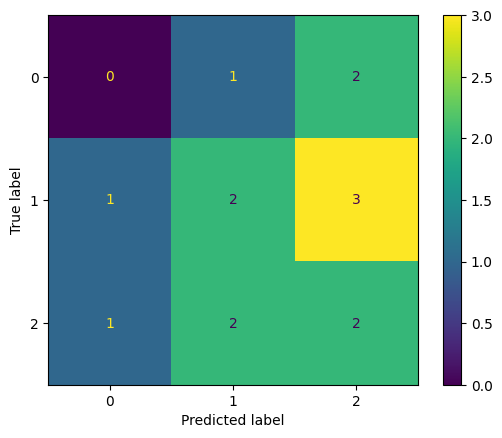

In [139]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred1)

### Coding for unknown image prediction

1/1 [==============================] - 0s 133ms/step
Prediction: DR3


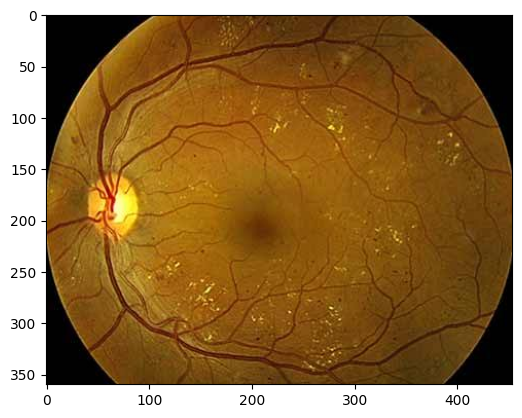

In [143]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/DRCNN_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["DR1", "DR2", "DR3"]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "/content/drive/MyDrive/Severe nPDR"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

testimage = image.load_img('/content/drive/MyDrive/Severe nPDR')
plt.imshow(testimage)


### ROC curves plotting for DR1, DR2 and DR3

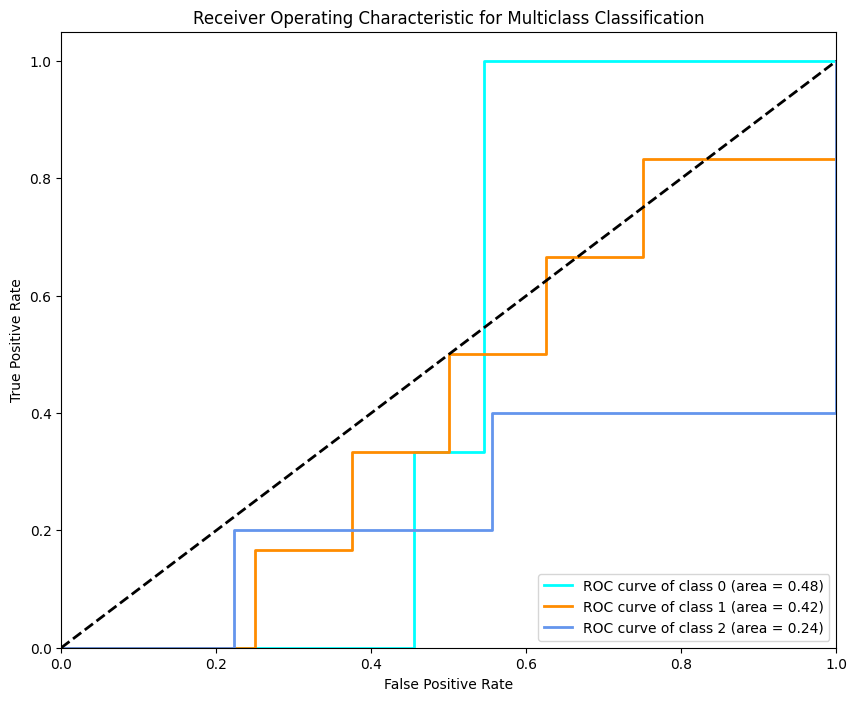

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

# Assuming you have your model predictions and ground truth labels
# model_predictions = Your model's predicted probabilities for each class
# ground_truth_labels = Ground truth labels for each sample

# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
ground_truth_labels_binary = label_binarizer.fit_transform(groundtruth)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_binarizer.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ground_truth_labels_binary[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_binarizer.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()


In [96]:
groundtruth = test_images.classes

# Thank you

In [ ]:
# https://github.com/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/11324aios_24_dr_cnn_model.ipynb